In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [8]:
train=pd.read_csv("train.csv")
print(train.shape)
train.head()
#we have 42000 images and 784 pixels

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test=pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y_train=train['label']
x_train=train.drop(labels=["label"],axis=1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

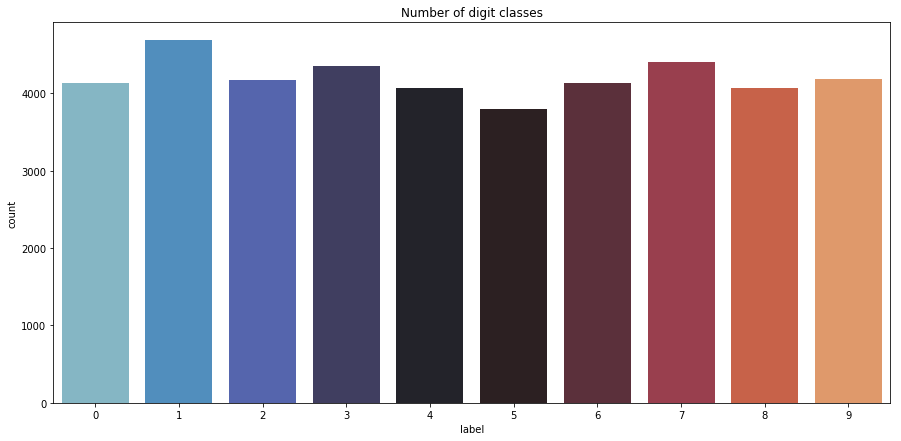

In [11]:
plt.figure( figsize=(15,7) )
g=sns.countplot(y_train,palette='icefire')
plt.title('Number of digit classes')
y_train.value_counts()

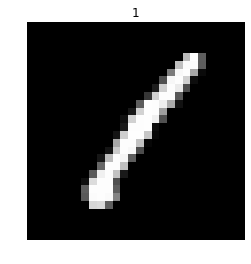

In [12]:
img=x_train.iloc[0].as_matrix() #take index 0 and convert it into matrix
img=img.reshape((28,28)) # change sizes into 28-28
plt.imshow(img,cmap='gray') #black-white drawing style
plt.title(train.iloc[0,0]) #set title
plt.axis('off')
plt.show()

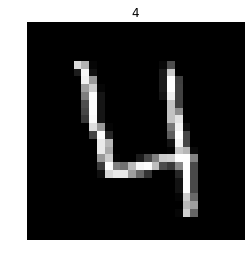

In [13]:
img=x_train.iloc[3].as_matrix() #take index 0 and convert it into matrix
img=img.reshape((28,28)) # change sizes into 28-28
plt.imshow(img,cmap='gray') #black-white drawing style
plt.title(train.iloc[3,0]) #set title
plt.axis('off')
plt.show()

In [14]:
#normalization yaparak 0-1 arasındaki bir değere taşıyoruz yani
#renkleri gray scale e dönüştürüyoruz

#we perform a grayscale normaliation to reduce the effect of illumination's
#differences ,if we perform normalization it works faster
#keras kullanırken train ve test imageları (28x28) olarak veremeyiz
#28x28x1 yazmalıyız en sondaki 1 gray scale olduğunu belirtir

#label encoding
#we should encode labels to one hot vectors
#2-->[0,0,1,0,0,0,0,0,0,0]
#4-->[0,0,0,0,1,0,0,0,0,0]


x_train=x_train/255.0 #bir rengin alabileceği max değer 255 olduğu için
test=test/255.0#255 e bölüyoruz
print('x_train shape: ',x_train.shape)
print('test shape: ',test.shape )

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [15]:
x_train=x_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1 )
print('x_train: ',x_train.shape )
print('test shape: ',test.shape )

x_train:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [16]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train,num_classes=10 ) #we have ten digits of num_classes is 10

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.10,random_state=42)

print('x_train shape',x_train.shape )
print('x_test shape',x_val.shape )
print('x_val shape',y_train.shape )
print('y_val shape',y_val.shape )


x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
x_val shape (37800, 10)
y_val shape (4200, 10)


In [18]:
#creating our model

#conv->>max pool-->dropout-->conc-->max pool-->dropout-->fully connected(2 layer)
#dropout is a technique where randomly selected neurons are ignored during training

from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense ,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model=Sequential()

#
model.add( Conv2D( filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add( Conv2D( filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add( MaxPool2D())

#
model.add( Conv2D( filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add( Conv2D( filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))

model.add( MaxPool2D())

#fully connected
model.add(Flatten())
model.add(Dense(512,activation='relu'))

model.add(Dense(10,activation='softmax')) #classification yüzdesel şekilde yapılır softmax de




In [19]:
optimizer=Adam(lr=0.01,beta_1=0.9,beta_2=0.999)
#here the learning rate is not constant,optimizer changes it,adaptive momentum optimizer

In [20]:
#compile model,we've used binary cross entropy but now w'll use categorical cross entropy
#means that we have multi classes.

#categorical cross entropy

model.compile( optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])


In [21]:
#say we have a dataset of 10 examples( or samples ).You have a batch size of 2 ,and you've specified 
#you want the algrotihm to run for 3 epoches.Therefore,in each epoch,you have 5 batches.(10/2=5)
#Each batch gets passed through the algorithm ,therefore you have 5 itertions per epoch.

#epoches=3 #for better result increase the epoches
#batch_size=64

In [22]:
#Data Augmentation 
#to avoid overfitting problem ,we need to expand artificially our handwritten digit dataset

datagen=ImageDataGenerator(
       rotation_range=8,
       featurewise_center=False,
       samplewise_center=False,
       featurewise_std_normalization=False,
       samplewise_std_normalization=False,
       zca_whitening=False,
       #randomly rotate images in the range 5 degrees
       zoom_range=0.5, #randomly zoom image
       width_shift_range=0.08,
       shear_range=0.3,#randomly shift images horizontally 0.5
       height_shift_range=0.08, #randomly shift images vertically 0.5
       horizontal_flip=False,
       vertical_flip=False)



batches = datagen.flow(x_train, y_train, batch_size=64)
val_batches = datagen.flow(x_val, y_val, batch_size=64)
datagen.fit(x_train)

In [23]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

W0805 16:41:31.873976 140085016221376 deprecation.py:323] From /home/rabia/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0805 16:41:31.956050 140085016221376 deprecation_wrapper.py:119] From /home/rabia/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/1
37800/37800 [==============================] - 3211s 85ms/step - loss: 0.2194 - acc: 0.9343 - val_loss: 0.1838 - val_acc: 0.9447


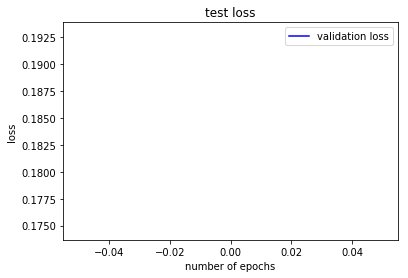

In [30]:
#we can change the batchsize,epochs make them increase so that we can get better reuslts of accuracy
#evaluate the model with confusion matrix

#neuron play backgorund website
#test loss visualization
#confusion matrix

plt.plot( history.history['val_loss'],color='b',label='validation loss')
plt.title('test loss')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

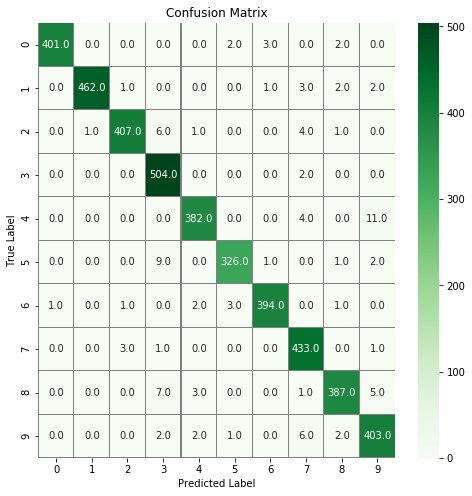

In [28]:
import seaborn as sns

#predict the values form the dataset
y_pred=model.predict(x_val)
#convert predictions classes to one hot vector
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax( y_val,axis=1 )
#compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred_classes)
#plot the confusion matrix
f,ax=plt.subplots( figsize=(8,8) )
sns.heatmap( confusion_mtx,annot=True,linewidths=0.1,cmap='Greens',linecolor='gray',fmt='.1f',ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [29]:
#we understand for example true label 4 and predicted label is 4 then we see the number is 428  most of the time we know it
#and it confuses for example 5 and 3  in the rate of 30

y_pred_comp=model.predict_classes(test,verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(y_pred_comp)+1)),
                         "Label": y_pred_comp})

submissions.head()
#submissions.to_csv("results.csv", index=False, header=True)



,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
